# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [3]:
print(cities)


['saint george', 'muroto', 'albany', 'kaputa', 'luderitz', 'punta arenas', 'taoudenni', 'veraval', 'bethel', 'barentsburg', 'qaqortoq', 'cape town', 'hermanus', 'busselton', 'khatanga', 'tabiauea', 'thompson', 'esperance', 'cayenne', 'port lincoln', 'norrtalje', 'ponta do sol', 'nikolskoye', 'hobart', 'clyde river', 'butaritari', 'albury', 'dinguiraye', 'tasiilaq', 'georgetown', 'upernavik', 'carnarvon', 'les cayes', 'mataura', 'ust-kuyga', 'urumqi', 'atuona', 'traralgon', 'rikitea', 'bluff', 'severo-kurilsk', 'lagoa', 'sile', 'hilo', 'sentyabrskiy', 'barrow', 'mirina', 'de aar', 'pevek', 'andros town', 'katsuura', 'micheweni', 'ewa beach', 'tumannyy', 'kavieng', 'lebu', 'dikson', 'kapaa', 'amderma', 'sao joao da barra', 'ushuaia', 'santa isabel do rio negro', 'muros', 'otautau', 'lata', 'sur', 'saint-philippe', 'talcahuano', 'kamenskoye', 'shingu', 'yellowknife', 'smithers', 'hami', 'ucluelet', 'sao filipe', 'hithadhoo', 'vaini', 'ponta delgada', 'pierre', 'vaitupu', 'matagami', 'norm

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# set up lists to hold reponse info
lat = []
temp = []
wind = []
humidity = []
cloudiness = []
country = []
date = []
lng = []
found_cities =[]
i = 0
# Loop through the list of cities and perform a request for data on each
for city in cities:
    i = i + 1
    try:    
#        print(query_url + city)
        print(f"Processing Record {i} | {city}")
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lng.append(response['coord']['lon'])
        found_cities.append(response['name'])
        responses.append(response) 
    except:
        pass
#        (f"City not found. Skipping")
print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")
print(f"The wind information received is: {wind}")
print(f"The humity information received is: {humidity}")
print(f"The cloudiness information received is: {cloudiness}")
print(f"The country information received is: {country}")
print(f"The date information received is: {date}")
print(f"The longitude information received is: {lng}")
print(f"The name of the city is: {found_cities}")

Processing Record 1 | saint george
Processing Record 2 | muroto
Processing Record 3 | albany
Processing Record 4 | kaputa
Processing Record 5 | luderitz
Processing Record 6 | punta arenas
Processing Record 7 | taoudenni
Processing Record 8 | veraval
Processing Record 9 | bethel
Processing Record 10 | barentsburg
Processing Record 11 | qaqortoq
Processing Record 12 | cape town
Processing Record 13 | hermanus
Processing Record 14 | busselton
Processing Record 15 | khatanga
Processing Record 16 | tabiauea
Processing Record 17 | thompson
Processing Record 18 | esperance
Processing Record 19 | cayenne
Processing Record 20 | port lincoln
Processing Record 21 | norrtalje
Processing Record 22 | ponta do sol
Processing Record 23 | nikolskoye
Processing Record 24 | hobart
Processing Record 25 | clyde river
Processing Record 26 | butaritari
Processing Record 27 | albury
Processing Record 28 | dinguiraye
Processing Record 29 | tasiilaq
Processing Record 30 | georgetown
Processing Record 31 | upern

Processing Record 249 | bandarban
Processing Record 250 | vestmannaeyjar
Processing Record 251 | candido mendes
Processing Record 252 | kloulklubed
Processing Record 253 | kemin
Processing Record 254 | nishihara
Processing Record 255 | yenagoa
Processing Record 256 | ariquemes
Processing Record 257 | takaungu
Processing Record 258 | pangkalanbuun
Processing Record 259 | opotiki
Processing Record 260 | paucartambo
Processing Record 261 | guerrero negro
Processing Record 262 | durban
Processing Record 263 | turukhansk
Processing Record 264 | haibowan
Processing Record 265 | seoul
Processing Record 266 | port elizabeth
Processing Record 267 | clarence town
Processing Record 268 | lasa
Processing Record 269 | rabo de peixe
Processing Record 270 | narkevychi
Processing Record 271 | orumiyeh
Processing Record 272 | kem
Processing Record 273 | hambantota
Processing Record 274 | culfa
Processing Record 275 | rio cuarto
Processing Record 276 | asau
Processing Record 277 | farrukhnagar
Processin

Processing Record 496 | balkanabat
Processing Record 497 | shibetsu
Processing Record 498 | lakes entrance
Processing Record 499 | limon
Processing Record 500 | santa maria
Processing Record 501 | sisimiut
Processing Record 502 | mandalgovi
Processing Record 503 | ornskoldsvik
Processing Record 504 | anjozorobe
Processing Record 505 | katherine
Processing Record 506 | umm kaddadah
Processing Record 507 | palaiokhora
Processing Record 508 | whitianga
Processing Record 509 | kahului
Processing Record 510 | laguna de perlas
Processing Record 511 | burica
Processing Record 512 | chapais
Processing Record 513 | berlevag
Processing Record 514 | safwah
Processing Record 515 | jacqueville
Processing Record 516 | malwan
Processing Record 517 | olonets
Processing Record 518 | yelniki
Processing Record 519 | byron bay
Processing Record 520 | college
Processing Record 521 | khani
Processing Record 522 | trebisacce
Processing Record 523 | andilamena
Processing Record 524 | palencia
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": found_cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng":lng,
    "Max Temp": temp,
    "Wind Speed": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint George,40,GR,1544282400,66,39.45,22.34,9.00,1.00
1,Muroto,32,JP,1544284399,100,33.37,134.14,4.68,4.66
2,Albany,75,US,1544281080,56,42.65,-73.75,-6.00,1.50
3,Kaputa,36,ZM,1544284469,85,-8.47,29.66,23.18,2.11
4,Luderitz,0,NA,1544284380,75,-26.65,15.16,17.68,8.61


In [8]:
weather_data.to_csv(output_data_file, encoding="utf-8", index=False)

In [9]:
#epoch = weather_data[Date]
epoch = 1544273160
time.strftime("%a, %d %b %Y %H:%M:%S %Z", time.localtime(epoch))

'Sat, 08 Dec 2018 06:46:00 CST'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

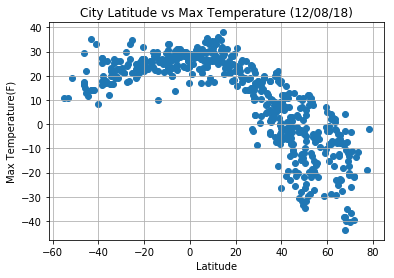

In [10]:
#Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")
#Incorporate the other graph propertites
plt.title("City Latitude vs Max Temperature (12/08/18)")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)


#### Latitude vs. Humidity Plot

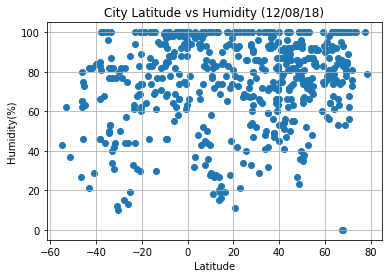

In [11]:
#Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")
#Incorporate the other graph propertites
plt.title("City Latitude vs Humidity (12/08/18)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

#### Latitude vs. Cloudiness Plot

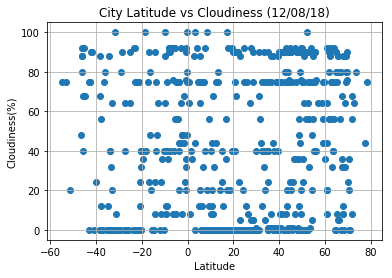

In [12]:
#Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")
#Incorporate the other graph propertites
plt.title("City Latitude vs Cloudiness (12/08/18)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

#### Latitude vs. Wind Speed Plot

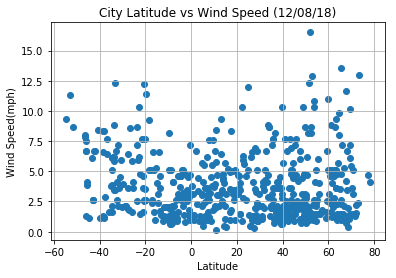

In [13]:
#Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")
#Incorporate the other graph propertites
plt.title("City Latitude vs Wind Speed (12/08/18)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

Maximum temperatures increase as expected when we approach the equator.  Cities in the southern latitudes experience higher temperatures similar to cities near the equator.  More cities north of the equator experience more humidity as compared to cities south of the equator.  Cities north of the equator experience higher wind speeds than those south of the equator.  I didn't see any significant correlation between latitude and cloudiness. 